import dataset melalui kaggle input

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
# loop data
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ColabNotebooks/deteksitanaman'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/ColabNotebooks/deteksitanaman/deteksi_tanaman_herbal.ipynb
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (25).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (24).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (27).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (26).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (29).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (28).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya/pepaya (2).JPG
/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Trai

import modul yang akan digunakan

In [34]:
#  mengelola peringatan (warnings) yang dikeluarkan dengan modul warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# import kebutuhan visualisasi dan manipulasi data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#konfigurasi
# menyetel matplotlib ke inline dan menampilkan grafik di bawah sel yang sesuai.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#pemilihan model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#proses dengan pustaka keras.
from keras.preprocessing.image import ImageDataGenerator

#kebutuhan pengolahan deeplearning-
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# kebutuhan neural network dan kawan-kawan -_-
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

#memanipulasi gambar yang di-zip dan mendapatkan array numpy dari nilai piksel gambar.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import itertools

mendeklarasikan path pada setiap data gambar yang akan digunakan

In [35]:
X=[]
Z=[]
IMG_SIZE=224
Daun_Pepaya_path='/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Pepaya'
Daun_Mint_path='/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Mint'
Daun_Sirih_path='/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Sirih'
Daun_Sirsak_path='/content/drive/MyDrive/ColabNotebooks/deteksitanaman/DATA SET TANAMAN HERBAL/Data Training/Daun Sirsak'

In [36]:
# penambahan untuk deteksi gambar canny (walaupun ga bagus :v )

Daun_Pepaya = os.listdir(Daun_Pepaya_path)
Daun_Mint = os.listdir(Daun_Mint_path)
Daun_Sirih = os.listdir(Daun_Sirih_path)
Daun_Sirsak = os.listdir(Daun_Sirsak_path)

print('Done')

Done


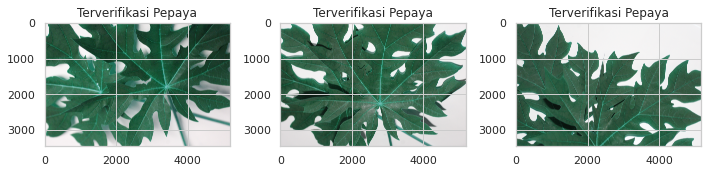

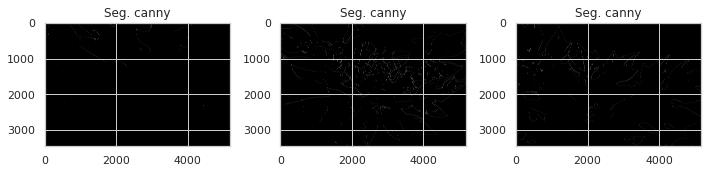

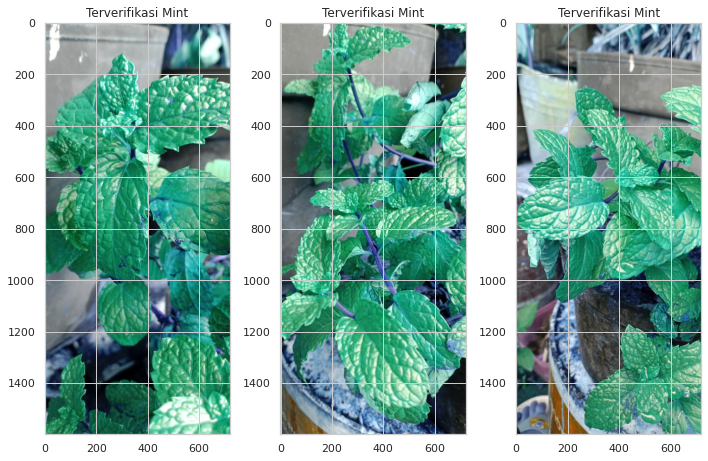

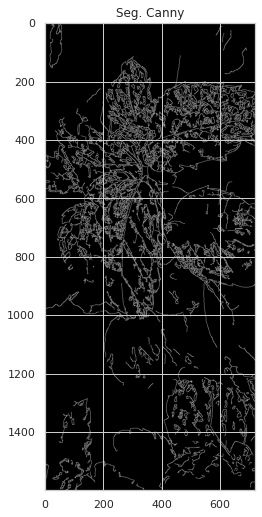

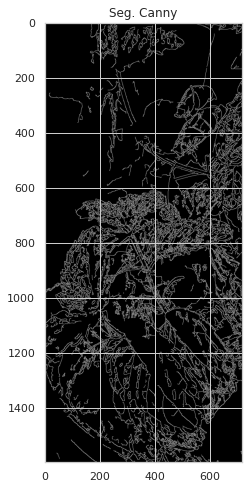

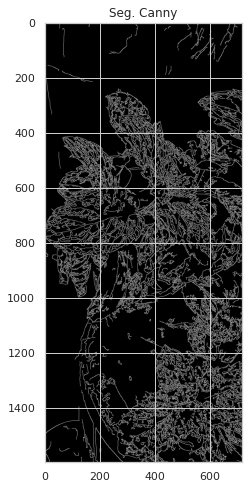

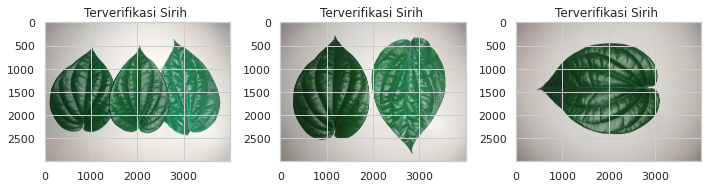

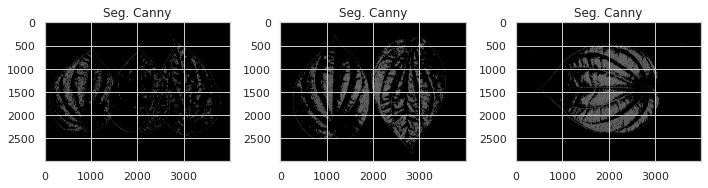

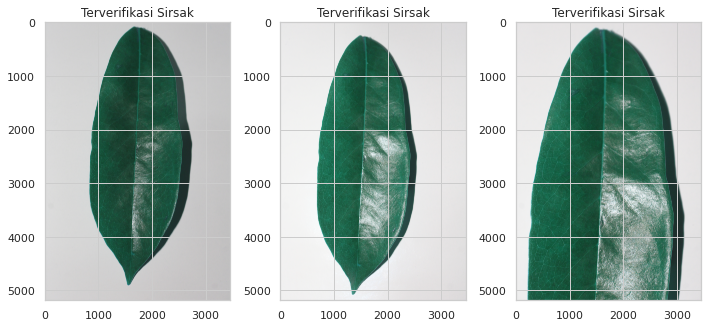

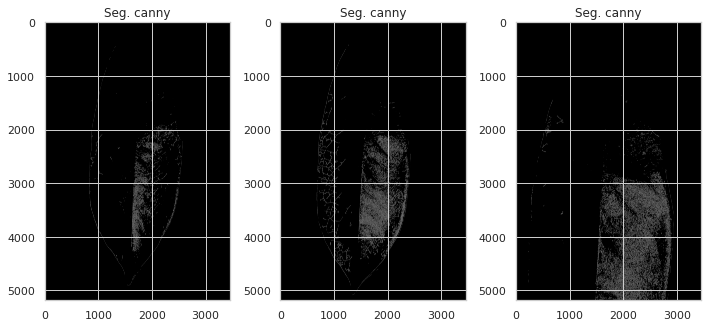

In [38]:
#VISUALISASI canny diatas(hasil random)
plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Pepaya_path + "/" + Daun_Pepaya[i])
    plt.imshow(img)
    plt.title('Terverifikasi Pepaya')
    plt.tight_layout()

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Pepaya_path + "/" + Daun_Pepaya[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()
    
    
plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Mint_path + "/" + Daun_Mint[i])
    plt.imshow(img)
    plt.title('Terverifikasi Mint')
    plt.tight_layout()

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Mint_path + "/" + Daun_Mint[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny')
    plt.tight_layout()

    plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Sirih_path + "/" + Daun_Sirih[i])
    plt.imshow(img)
    plt.title('Terverifikasi Sirih ')
    plt.tight_layout()

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Sirih_path + "/" + Daun_Sirih[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny')
    plt.tight_layout()

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Sirsak_path + "/" + Daun_Sirsak[i])
    plt.imshow(img)
    plt.title('Terverifikasi Sirsak')
    plt.tight_layout()

plt.figure(figsize = (10,10))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img = cv2.imread(Daun_Sirsak_path + "/" + Daun_Sirsak[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. canny')
    plt.tight_layout()


    

plt.show()

membuat variable

In [40]:
def assign_label(img,tanaman_herbal):
    return tanaman_herbal

memberikan label pada data dan menyatukan data menjadi path

In [42]:
def make_train_data(tanaman_herbal,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,tanaman_herbal)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

membuat train data path dan penamaan

In [43]:
make_train_data('Daun Pepaya',Daun_Pepaya_path)
print(len(X))

100%|██████████| 30/30 [00:36<00:00,  1.21s/it]

30


In [44]:
make_train_data('Daun Mint',Daun_Mint_path)
print(len(X))

100%|██████████| 30/30 [00:12<00:00,  2.35it/s]

60


In [45]:
make_train_data('Daun Sirih',Daun_Sirih_path)
print(len(X))

100%|██████████| 30/30 [00:26<00:00,  1.13it/s]

90


In [46]:
make_train_data('Daun Sirsak',Daun_Sirsak_path)
print(len(X))

100%|██████████| 30/30 [00:36<00:00,  1.22s/it]

120


menampilkan data gambar secara acak beserta nama tanaman herbal


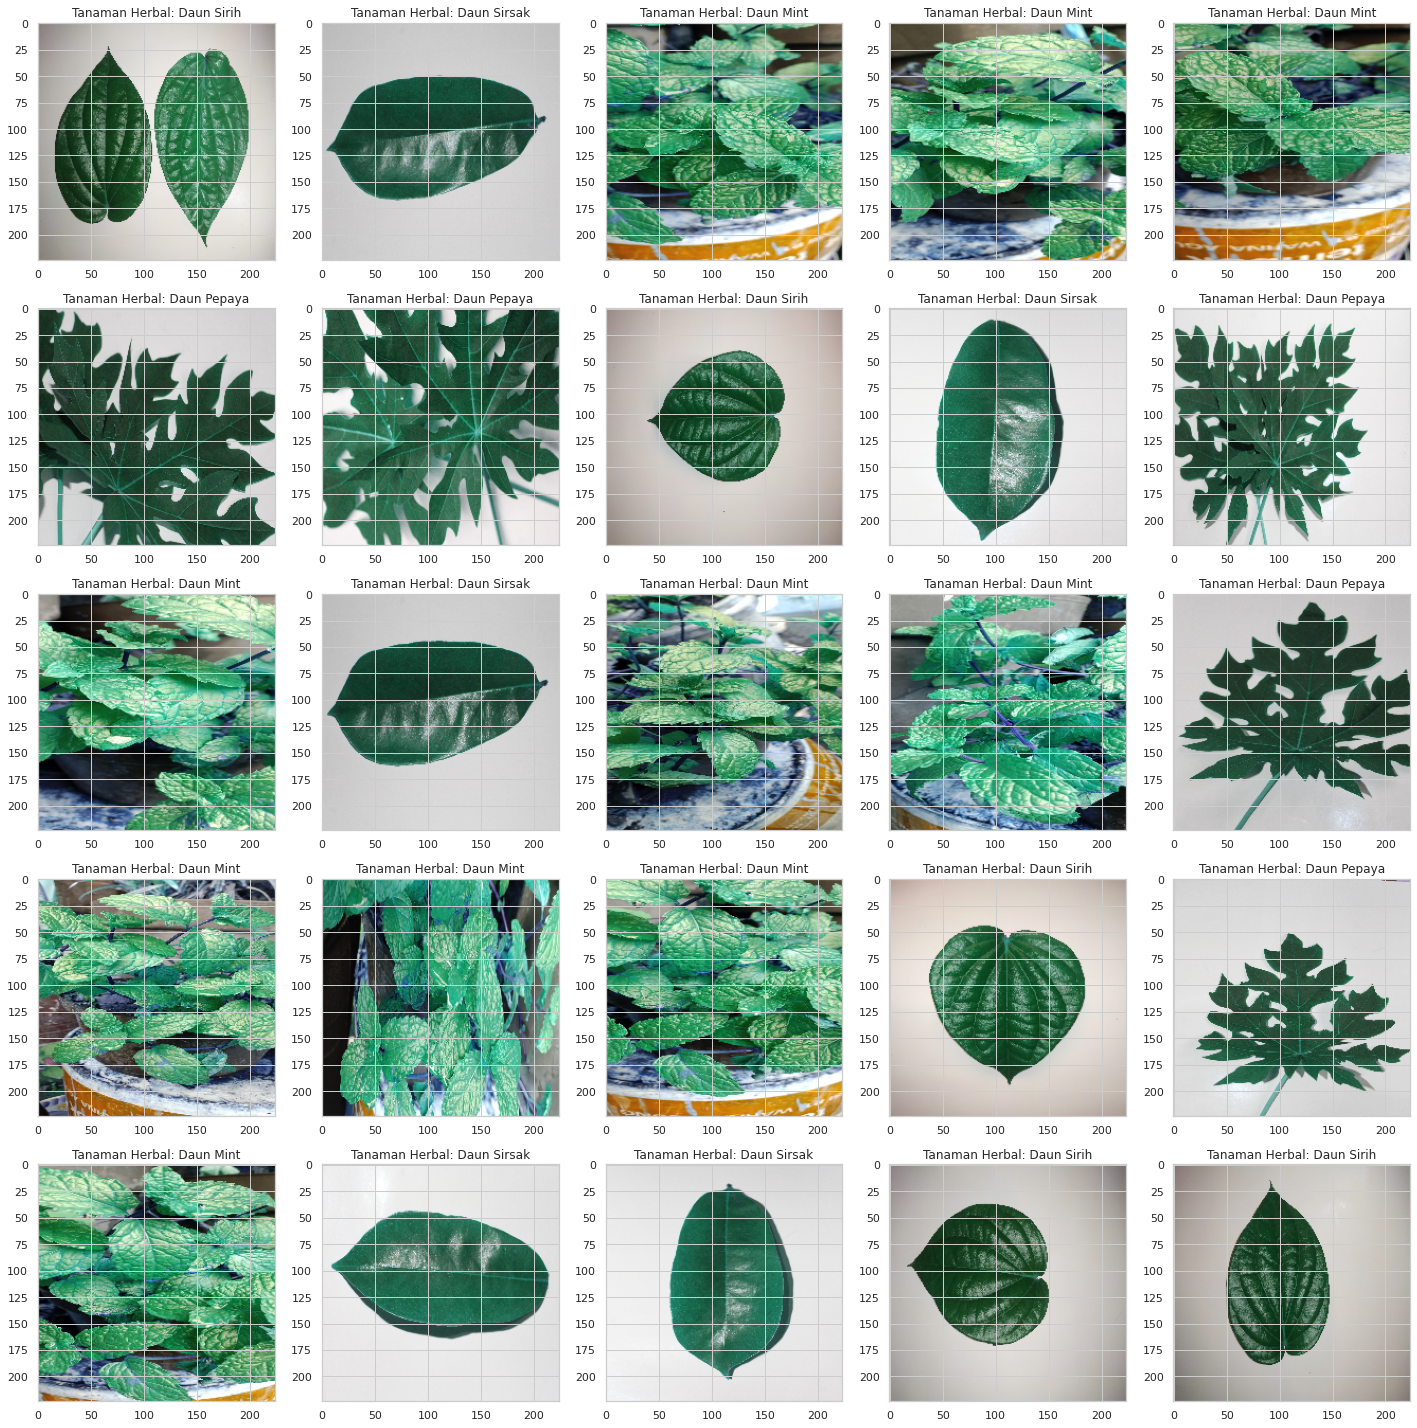

In [47]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(20,20)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tanaman Herbal: '+Z[l])
      #    img = cv2.imread(Daun_Pepaya_path + "/" + Daun_Pepaya[i])
      #  edges = cv2.Canny(img,25,255,L2gradient=False)
        
plt.tight_layout()

membuat label kode untuk setiap variable

In [48]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,10)
X=np.array(X)
X=X/255

membagi dataset menjadi data pelatihan 

In [50]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=10)

mengambil data secara acak(random) untuk data train dan test

In [52]:
np.random.seed(10)
rn.seed(10)
tf.random.set_seed(10)

membangun model data Convolutional Neural Network untuk Sequential tabel

In [54]:
# modeling cnn dengan data alakedar

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (17,17),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

membuat val akurasi untuk epoch data

In [56]:
from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# script diatas dilakukan untuk menentukan kinerja model dalam mengatasi masalah overfitting, serta membantu dalam menentukan kapan proses pelatihan harus dihentikan.

membuat datagen untuk augmentasi data

In [57]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

memberi keterangan untuk loss akurasi dan metrics akurasi

In [58]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

melakukan proses pelatihan data dengan model.fit_generator

In [59]:
batch=20
epoch=80
step = np.ceil(x_train.shape[0]/batch)
History = model.fit_generator(
    datagen.flow(x_train,y_train, batch_size=batch),
    epochs = epoch,
    validation_data = (x_test,y_test),
    verbose = 1,
    steps_per_epoch=step
)

Epoch 1/80
5/5 [==============================] - 41s 8s/step - loss: 2.7546 - accuracy: 0.3556 - val_loss: 1.4403 - val_accuracy: 0.1667
Epoch 2/80
5/5 [==============================] - 38s 8s/step - loss: 1.5885 - accuracy: 0.3000 - val_loss: 1.6272 - val_accuracy: 0.2333
Epoch 3/80
5/5 [==============================] - 37s 7s/step - loss: 1.6375 - accuracy: 0.3556 - val_loss: 1.5470 - val_accuracy: 0.3333
Epoch 4/80
5/5 [==============================] - 37s 7s/step - loss: 1.4751 - accuracy: 0.3444 - val_loss: 1.5539 - val_accuracy: 0.1667
Epoch 5/80
5/5 [==============================] - 36s 7s/step - loss: 1.3954 - accuracy: 0.2667 - val_loss: 1.2916 - val_accuracy: 0.3667
Epoch 6/80
5/5 [==============================] - 37s 7s/step - loss: 1.3279 - accuracy: 0.3556 - val_loss: 1.3232 - val_accuracy: 0.1667
Epoch 7/80
5/5 [==============================] - 40s 8s/step - loss: 1.2048 - accuracy: 0.4556 - val_loss: 1.2204 - val_accuracy: 0.4667
Epoch 8/80
5/5 [==================

Tingkat akurasi yang diperoleh diatas masih di bawah 50% pada data validasi, hal ini menunjukkan bahwa model masih belum optimal dalam mengatasi masalah klasifikasi. Loss yang diperoleh pada data validasi jauh lebih tinggi dibandingkan dengan data latih, menunjukkan bahwa model masih belum dapat mengatasi masalah overfitting.

Dalam kesimpulan, model masih perlu dioptimalkan lebih lanjut untuk meningkatkan kinerjanya, seperti dengan menambah jumlah data latih, mengubah arsitektur model, menambah jumlah epoh pelatihan, dll.

menyimpan hasil model kedalam format h5

In [60]:
model.save('/content/drive/MyDrive/ColabNotebooks/deteksitanaman/hasil_model_working/Tanaman_Herbal.h5')

mengkonversikan model h5 ke tflite

In [61]:
saved_model_dir = '/content/drive/MyDrive/ColabNotebooks/deteksitanaman/hasil_model_working/'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

target_names = ['Daun Mint','Daun Pepaya','Daun Sirih','Daun Sirsak']
labels = '\n'.join(target_names)

with open('labels.txt', 'w') as f:
  f.write(labels)

menampilkan arsitektur model squential tabel

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      27776     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 96)      

menampilkan confusion matrix

In [ ]:
Y_pred = model.predict_generator(x_test)
y_pred = np.argmax(Y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1 1 0]
 [0 3 0 0]
 [0 0 1 0]
 [0 0 1 0]]


menampilkan  report hasil classification

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Daun Mint       1.00      0.33      0.50         3
 Daun Pepaya       0.75      1.00      0.86         3
  Daun Sirih       0.33      1.00      0.50         1
 Daun Sirsak       0.00      0.00      0.00         1

    accuracy                           0.62         8
   macro avg       0.52      0.58      0.46         8
weighted avg       0.70      0.62      0.57         8



membuat ulang variabel untuk model format h5

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/ColabNotebooks/deteksitanaman/hasil_model_working/Tanaman_Herbal.h5')

menampilkan arsitektur model squential tabel

In [ ]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      27776     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)      

menampilkan grafik loss

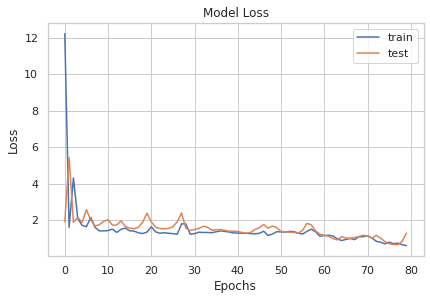

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

menampilkan grafik accuracy

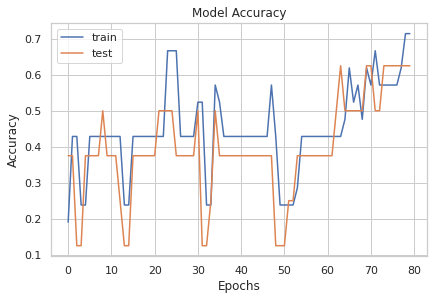

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()